In [ ]:
!pip install pyod
!pip install pandas
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.1-py3-none-any.whl size=193267 sha256=3df5193d9475f31cb452e8fafd7f990c36a2f1f24f09017603cb2faf7fdb15f2
  Stored in directory: /root/.cache/pip/wheels/94/75/88/b853cf33b0053b0a001dca55b74d515048b7656e736364eb57
Successfully built pyod


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from sklearn.preprocessing import StandardScaler


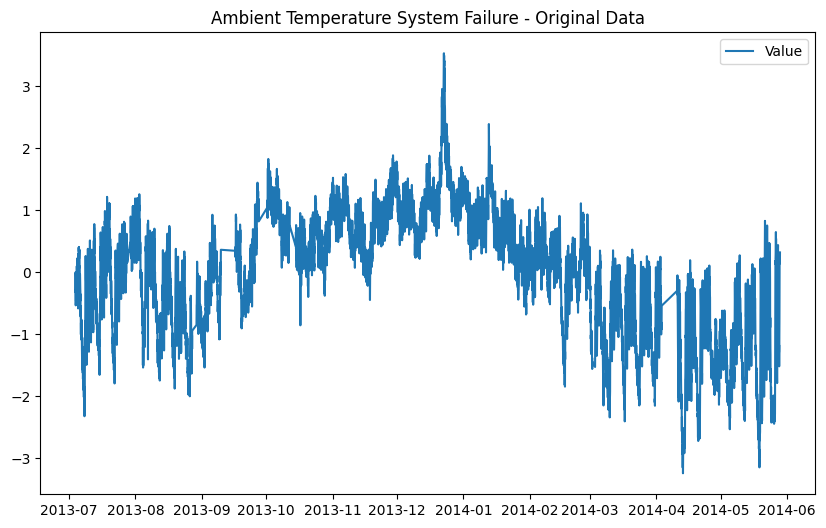

In [ ]:
# Load dataset from NAB repository
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv"
data = pd.read_csv(url, parse_dates=['timestamp'])

# Set timestamp as index
data.set_index('timestamp', inplace=True)

# Normalize the data
scaler = StandardScaler()
data['value'] = scaler.fit_transform(data[['value']])

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['value'], label='Value')
plt.title('Ambient Temperature System Failure - Original Data')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


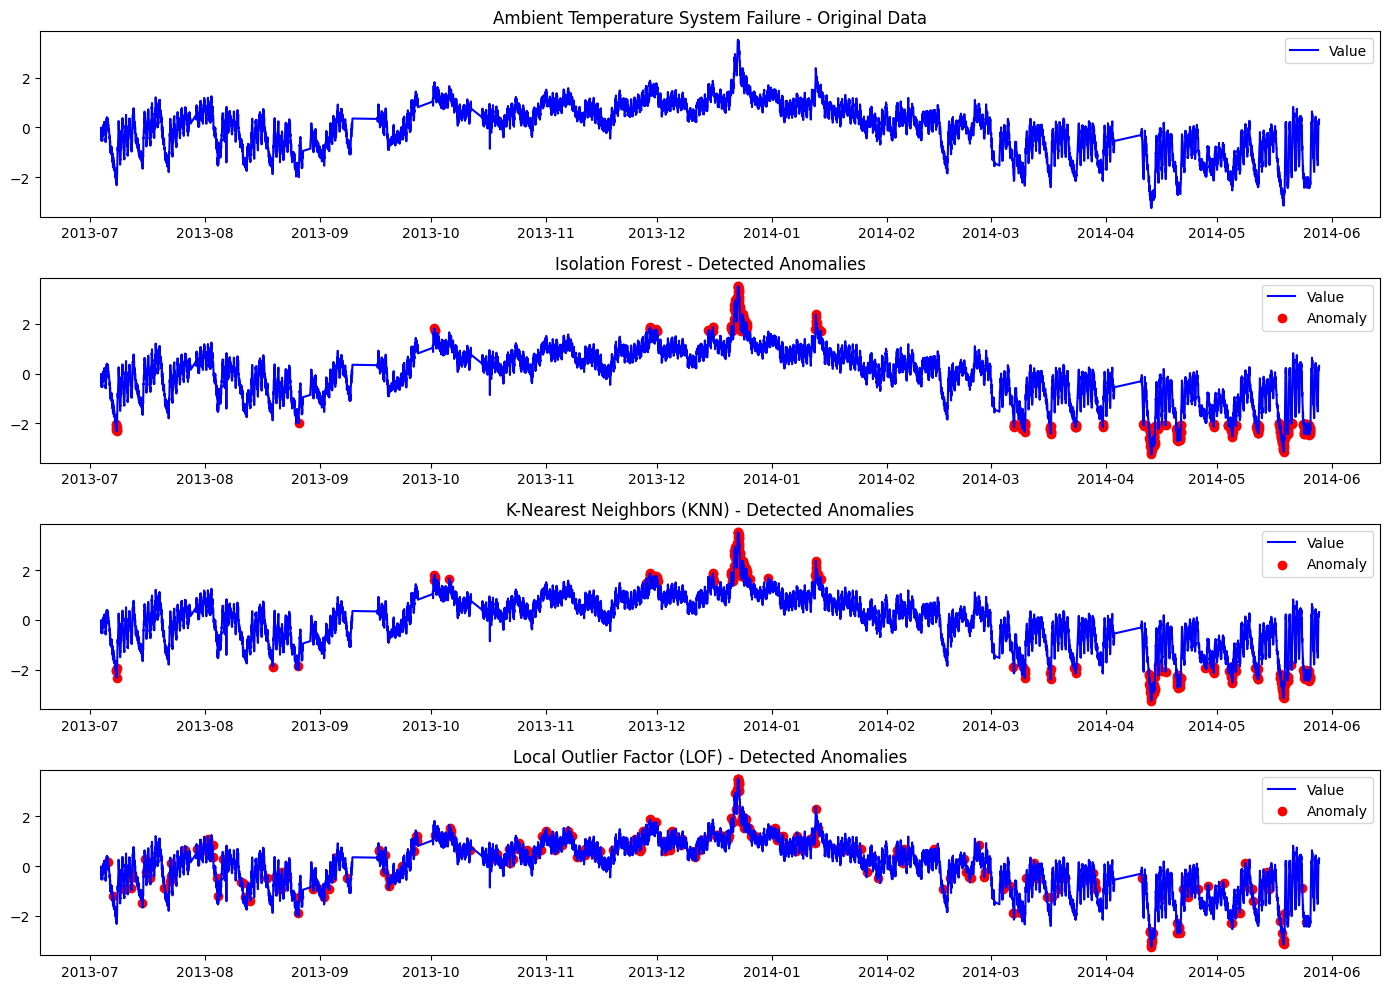

In [ ]:
def apply_anomaly_detection(model, data):
    model.fit(data[['value']])
    data['score'] = model.decision_function(data[['value']])
    data['anomaly'] = model.predict(data[['value']])
    return data

# Define models
models = {
    'Isolation Forest': IForest(contamination=0.05),
    'K-Nearest Neighbors (KNN)': KNN(contamination=0.05),
    'Local Outlier Factor (LOF)': LOF(contamination=0.05)
}

# Apply anomaly detection for each model
results = {}
for model_name, model in models.items():
    results[model_name] = apply_anomaly_detection(model, data.copy())

# Plot results for each algorithm
plt.figure(figsize=(14, 10))

# Plot original data
plt.subplot(4, 1, 1)
plt.plot(data.index, data['value'], label='Value', color='blue')
plt.title('Ambient Temperature System Failure - Original Data')
plt.legend()

# Plot each algorithm's detected anomalies and scores
for i, (model_name, result) in enumerate(results.items(), start=2):
    plt.subplot(4, 1, i)
    plt.plot(data.index, result['value'], label='Value', color='blue')
    plt.scatter(result.index[result['anomaly'] == 1],
                result['value'][result['anomaly'] == 1],
                color='red', label='Anomaly')
    plt.title(f'{model_name} - Detected Anomalies')
    plt.legend()

plt.tight_layout()
plt.show()